In [1]:
from collections import defaultdict
from itertools import chain
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
import seaborn as sns
from sklearn.mixture import GaussianMixture
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

In [248]:
PREFIX = "/data/analytics/catch_bonds/1sq0_fix"
df_dict = dict()

props_list = ["dist_com", "dists_max_chains", "rmsds_A", "gyration_A"]
cols_list = [["Center-of-mass distance, nm"], ["Maximum distance, nm"], ["RMSD, nm"], ["Radius of gyration, nm", "Rx, nm", "Ry, nm", "Rz, nm"]]
pairs = [(44, 5), (45, 6)]

for pair in pairs:
    pair_str = "{}_{}".format(*pair)
    df_dict[pair] = dict()
    
    for prop, cols in zip(props_list, cols_list):
        df_dict[pair][prop] = dict()

        for rep in range(1, 11):
            df_dict[pair][prop][rep] = dict()

            for force in np.arange(0, 2.1, .1):
                force_str = str(int(force)) if force == int(force) else str(force)

                if prop == "dist_com":
                    df = pd.read_csv("{}_{}/{}/{}_{}.xvg".format(PREFIX, pair_str, prop, rep, force_str), 
                                     skiprows=23 + len(cols), 
                                     header=None,
                                     engine="python",
                                     sep="    ")
                else:
                    df = pd.read_csv("{}_{}/{}/{}_{}.xvg".format(PREFIX, pair_str, prop, rep, force_str), 
                                     skiprows=23 + len(cols), 
                                     header=None,
                                     engine="python",
                                     sep="\s+")

                df.columns = ["Frame"] + cols

                df_dict[pair][prop][rep][int(force * 10)] = df

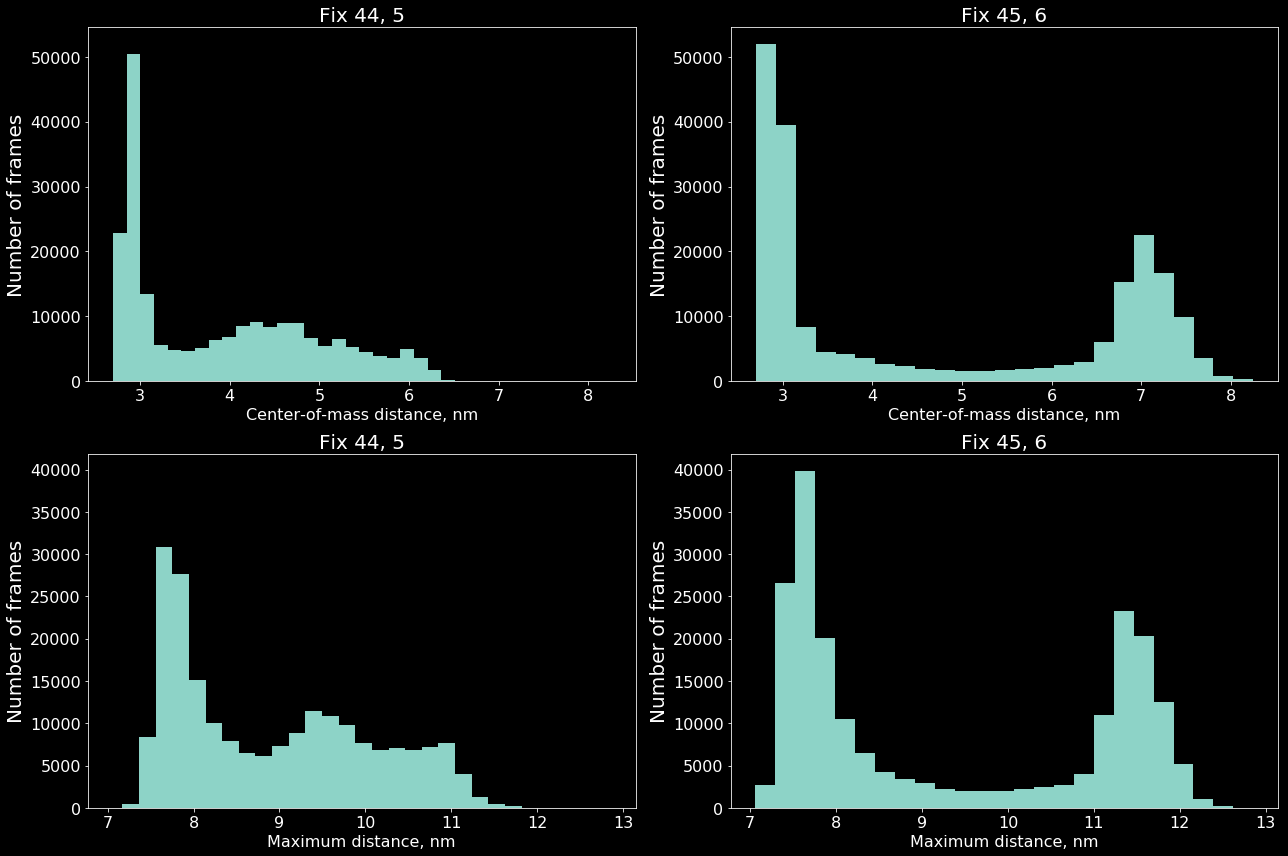

In [249]:
fig = plt.figure(figsize=(18, 12))

props = ["dist_com", "dists_max_chains"]
prop_names = ["Center-of-mass distance, nm", "Maximum distance, nm"]

for prop_i, (prop, prop_name) in enumerate(zip(props, prop_names)):
    for p_i, pair in enumerate(pairs):

        prop_dict = defaultdict(list)

        for rep in range(1, 11):
            for force in np.arange(0, 2.1, .1):
                prop_dict[int(force * 10)].extend(df_dict[pair][prop][rep][int(force * 10)].values[:, 1])

        if p_i == 0:
            ax = fig.add_subplot(len(props), len(pairs), len(pairs) * prop_i + 1)
        else:
            ax = fig.add_subplot(len(props), len(pairs), len(pairs) * prop_i + p_i + 1, sharex=ax, sharey=ax)
        ax.hist(list(chain(*[v for v in prop_dict.values()])), density=False, bins=25);

        ax.set_title("Fix {}, {}".format(*pair), fontdict={"size": 20})
        [t.set_fontsize(16) for t in ax.get_xticklabels()]
        ax.set_xlabel(prop_name, fontdict={"size": 16})
        [t.set_fontsize(16) for t in ax.get_yticklabels()]
        ax.set_ylabel("Number of frames", fontdict={"size": 20})
        
plt.tight_layout()

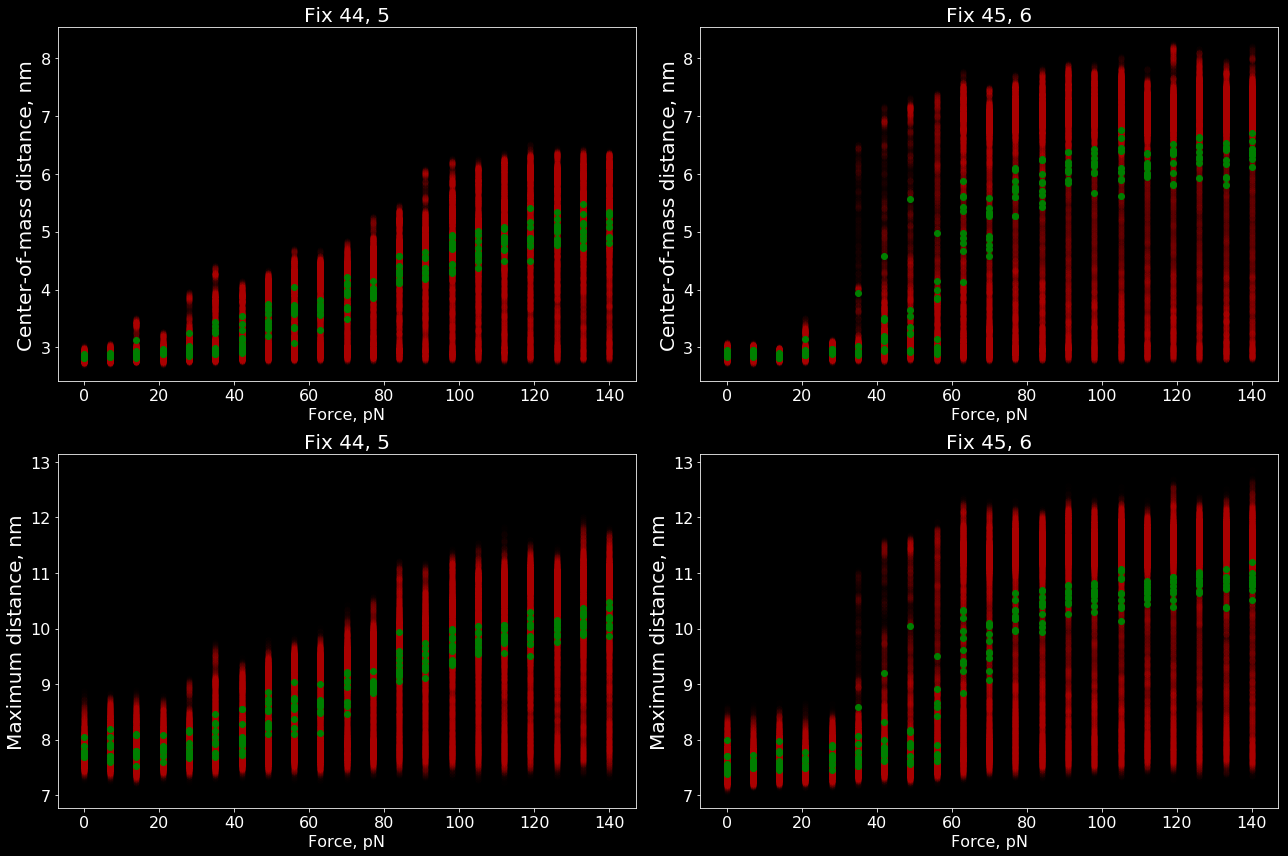

In [250]:
fig = plt.figure(figsize=(18, 12))

props = ["dist_com", "dists_max_chains"]
prop_names = ["Center-of-mass distance, nm", "Maximum distance, nm"]

for prop_i, (prop, prop_name) in enumerate(zip(props, prop_names)):
    for p_i, pair in enumerate(pairs):

        prop_dict = defaultdict(list)

        for rep in range(1, 11):
            for force in np.arange(0, 2.1, .1):
                prop_dict[int(force * 10)].extend(df_dict[pair][prop][rep][int(force * 10)].values[:, 1])

        if p_i == 0:
            ax = fig.add_subplot(len(props), len(pairs), len(pairs) * prop_i + 1)
        else:
            ax = fig.add_subplot(len(props), len(pairs), len(pairs) * prop_i + p_i + 1, sharex=ax, sharey=ax)
        
        for k, v in prop_dict.items():
            ax.plot([k * 7] * len(v), v, "ro", alpha=.01)

            for rep in range(REPS):
                ax.plot([k * 7], np.mean(v[rep*1000:(rep+1)*1000]), "go")

        ax.set_title("Fix {}, {}".format(*pair), fontdict={"size": 20})
        [t.set_fontsize(16) for t in ax.get_xticklabels()]
        ax.set_xlabel("Force, pN", fontdict={"size": 16})
        [t.set_fontsize(16) for t in ax.get_yticklabels()]
        ax.set_ylabel(prop_name, fontdict={"size": 20})
        
plt.tight_layout()

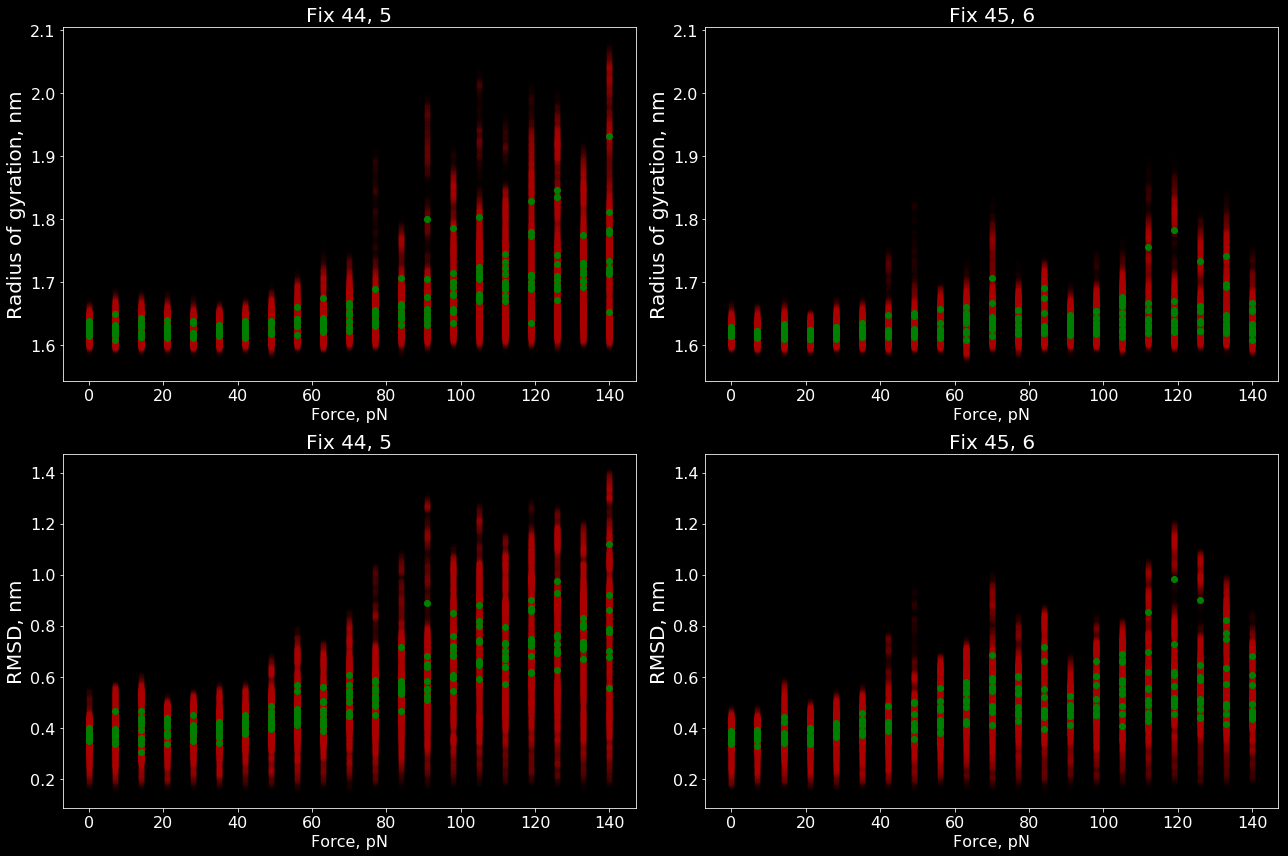

In [251]:
fig = plt.figure(figsize=(18, 12))

props = ["gyration_A", "rmsds_A"]
prop_names = ["Radius of gyration, nm", "RMSD, nm"]

for prop_i, (prop, prop_name) in enumerate(zip(props, prop_names)):
    for p_i, pair in enumerate(pairs):

        prop_dict = defaultdict(list)

        for rep in range(1, 11):
            for force in np.arange(0, 2.1, .1):
                prop_dict[int(force * 10)].extend(df_dict[pair][prop][rep][int(force * 10)].values[:, 1])

        if p_i == 0:
            ax = fig.add_subplot(len(props), len(pairs), len(pairs) * prop_i + 1)
        else:
            ax = fig.add_subplot(len(props), len(pairs), len(pairs) * prop_i + p_i + 1, sharex=ax, sharey=ax)
        
        for k, v in prop_dict.items():
            ax.plot([k * 7] * len(v), v, "ro", alpha=.01)

            for rep in range(REPS):
                ax.plot([k * 7], np.mean(v[rep*1000:(rep+1)*1000]), "go")

        ax.set_title("Fix {}, {}".format(*pair), fontdict={"size": 20})
        [t.set_fontsize(16) for t in ax.get_xticklabels()]
        ax.set_xlabel("Force, pN", fontdict={"size": 16})
        [t.set_fontsize(16) for t in ax.get_yticklabels()]
        ax.set_ylabel(prop_name, fontdict={"size": 20})
        
plt.tight_layout()